In [5]:
using Pkg
Pkg.activate("./VisualisationToolKit")
Pkg.instantiate()

  Activating project at `~/Documents/Robin/ut4m-cardio/Julia/Script_Robin/VisualisationToolKit`


In [6]:
using Plots
using DataFrames
using XLSX

In [7]:
data = XLSX.readxlsx("../../Ressources/Données complètes UT4M final120419 avec Data cardio.xlsx")["Tableau_gl"]
data = data["A1:SD80"]

80×498 Matrix{Any}:
 "CODE_SUJET"     "COURSE"    "AGE"  …    "STSi_D_10"    "FRVD_D_10"
 "AMJE41"      100          26           7.00535        0.496154
 "BELA77"      100          51           6.42458        0.427861
 "BLLI42"      100          43           5.33333        0.561644
 "BOAN44"      100          26           5.55556        0.502924
 "CAJE22"      100          36       …   7.36842        0.453125
 "GODA23"      100          30           7.74359        0.378601
 "LALO51"      100          30          -1             -1
 "MEJE46"      100          35           7.2561         0.367021
 "MOMI6"       100          35           5.38462        0.482759
 "MOQU74"      100          30       …   4.97462        0.6
 "POFR81"      100          42           8.4492         0.416974
 "SEFL43"      100          26          -1             -1
 ⋮                                   ⋱                 
 "LELA15"      160          40           6.37838        0.421569
 "MAST16"      160          4

In [8]:
function build_dataframe_from_course_name(int_course, data)
    index = vcat(1, findall(x -> x == int_course, data[2:end, 2]) .+ 1)
    df = data[index,:]
    replace!(df, -1 => missing)
    df_course = DataFrame(df[2:end, 2:end], Symbol.(df[1, 2:end]), makeunique=true)
    CODE_SUJET_df = DataFrame([:"CODE_SUJET" => df[2:end, 1]])
    df_course = hcat(CODE_SUJET_df, df_course)
    return df_course
end
df_100 = build_dataframe_from_course_name(100, data)
df_160 = build_dataframe_from_course_name(160, data)
df_40 = build_dataframe_from_course_name(40, data)

Row,CODE_SUJET,COURSE,AGE,POIDS_INC,TAILLE,EXP_TRAIL,TRAINING,CL_SCRA,TOT_SCRA,CL_SEH,TOT_SEH,CL_SEF,TOT_SEF,CL_V1H,TOT_V1H,CL_V1F,TOT_V1F,CL_V2H,TOT_V2H,CL_V2F,TOT_V2F,DDC,HDA,PF_DOUBLET_100HZ_PRE,PF_DOUBLET_100HZ_POST,PF_DOUBLET_100HZ_D_2,PF_DOUBLET_100HZ_D_5,PF_DOUBLET_100HZ_D_10,PF_DOUBLET_10HZ_PRE,PF_DOUBLET_10HZ_POST,PF_DOUBLET_10HZ_D_2,PF_DOUBLET_10HZ_D_5,PF_DOUBLET_10HZ_D_10,PF_FORCE_RATIO10:100_PRE,PF_FORCE_RATIO10:100_POST,PF_FORCE_RATIO10:100_D_2,PF_FORCE_RATIO10:100_D_5,PF_FORCE_RATIO10:100_D_10,PF_MVC_NO_STIM_PRE,PF_MVC_NO_STIM_POST,PF_MVC_NO_STIM_D_2,PF_MVC_NO_STIM_D_5,PF_MVC_NO_STIM_D_10,PF_SINGLE_TW_PRE,PF_SINGLE_TW_POST,PF_SINGLE_TW_D_2,PF_SINGLE_TW_D_5,PF_SINGLE_TW_D_10,PF_VA_PRE,PF_VA_POST,PF_VA_D_2,PF_VA_D_5,PF_VA_D_10,KE_DOUBLET_100HZ_PRE,KE_DOUBLET_100HZ_POST,KE_DOUBLET_100HZ_D_2,KE_DOUBLET_100HZ_D_5,KE_DOUBLET_100HZ_D_10,KE_DOUBLET_10HZ_PRE,KE_DOUBLET_10HZ_POST,KE_DOUBLET_10HZ_D_2,KE_DOUBLET_10HZ_D_5,KE_DOUBLET_10HZ_D_10,KE_RATIO10:100_PRE,KE_RATIO10:100_POST,KE_RATIO10:100_D_2,KE_RATIO10:100_D_5,KE_RATIO10:100_D_10,KE_MVC_NO_STIM_PRE,KE_MVC_NO_STIM_POST,KE_MVC_NO_STIM_D_2,KE_MVC_NO_STIM_D_5,KE_MVC_NO_STIM_D_10,KE_SINGLE_TW_PRE,KE_SINGLE_TW_POST,KE_SINGLE_TW_D_2,KE_SINGLE_TW_D_5,KE_SINGLE_TW_D_10,KE_VA_PRE,KE_VA_POST,KE_VA_D_2,KE_VA_D_5,KE_VA_D_10,RR_COUCHE_PRE,SDNN_COUCHE_PRE,HR_COUCHE_PRE,RMSSD_COUCHE_PRE,PNN50_COUCHE_PRE,LF_COUCHE_PRE,HF_COUCHE_PRE,LFHF_COUCHE_PRE,DUREE_TEST_COUCHE_PRE,RR_DEBOUT_PRE,SDNN_DEBOUT_PRE,HR_DEBOUT_PRE,RMSSD_DEBOUT_PRE,PNN50_DEBOUT_PRE,LF_DEBOUT_PRE,HF_DEBOUT_PRE,LFHF_DEBOUT_PRE,⋯
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,⋯
1,ACRE75,40,43,74,170,2,3.5,347,416,998,998,998,998,998,998,23,35,998,998,998,998,575,16:35:00,38,31,35,34,35,35,27,35,31,34,0.921053,0.870968,1,0.911765,0.971429,123,103,142,135,147,21,17,22,19,21,97.3684,93.5484,100,100,100,197,169,190,163,203,192,147,210,176,211,0.974619,0.869822,1.10526,1.07975,1.03941,475,406,429,421,450,125,98,133,112,129,97.9695,86.9822,96.8421,95.7055,96.0591,792.3,33.7,75.86,18.2,0.3,40.5,59.2,0.685,300,635,33.5,94.76,13.3,0.2,90.7,9.3,9.749,⋯
2,BAMA12,40,27,49,158,2,2,187,416,998,998,14,41,998,998,998,998,998,998,998,998,457,14:37:00,40,35,39,31,42,38,32,42,32,40,0.95,0.914286,1.07692,1.03226,0.952381,113,73,115,125,104,25,20,25,19,25,90,60,92.3077,96.7742,88.0952,184,172,159,159,149,191,147,173,166,157,1.03804,0.854651,1.08805,1.04403,1.05369,489,413,435,442,410,160,127,125,113,109,91.8478,90.1163,96.2264,96.2264,98.6577,1482.5,88.2,40.62,110,69.8,14.2,85.8,0.166,300,1134.8,112.5,53.37,68,47.1,63.1,36.9,1.713,⋯
3,BAPI39,40,31,80,184,4,6,33,416,24,184,998,998,998,998,998,998,998,998,998,998,352,12:52:00,75,60,77,70,81,71,55,76,67,79,0.946667,0.916667,0.987013,0.957143,0.975309,221,131,206,196,207,44,35,47,42,48,96,76.6667,100,100,98.7654,295,257,278,277,286,316,246,305,300,308,1.07119,0.957198,1.09712,1.08303,1.07692,638,533,577,600,616,191,159,195,190,195,94.2373,77.821,92.8058,96.7509,95.8042,849.3,69.5,71.13,34.7,14.7,85.9,14.1,6.08,300,686.3,44.5,87.79,18.1,1.8,87.8,12.1,7.231,⋯
4,CACL10,40,40,64,178,2,2,138,416,998,998,998,998,28,76,998,998,998,998,998,998,433,14:13:00,44,35,42,45,41,45,34,44,44,45,1.02273,0.971429,1.04762,0.977778,1.09756,145,99,149,168,157,27,20,26,27,29,100,77.1429,100,97.7778,97.561,227,220,191,243,240,250,222,197,259,231,1.10132,0.965217,1.03141,1.06584,0.9625,575,296,406,494,510,166,149,142,167,148,96.9163,70.8696,95.288,89.7119,97.9167,870.8,73.8,69.35,55.4,19.1,40.9,59.1,0.693,300,816.8,65.1,73.9,42.8,10.7,86.4,13.6,6.376,⋯
5,CIJE58,40,36,65,170,4,4,397,416,183,184,998,998,998,998,998,998,998,998,998,998,645,17:45:00,60,54,44,59,60,59,48,44,60,61,

In [9]:
function multi_line_plot(df::DataFrame, search_str::String)
    selected_columns = filter(col -> occursin(search_str, String(col)), names(df))
    
    df_selected = df[:, selected_columns]

    plt = plot(title="Line Plots for "*search_str, xlabel="Columns", ylabel="Values", legend=true)
    
    for i in 1:nrow(df_selected)
        row_data = df_selected[i, :]
        y_values = Vector{Union{Missing, Float64}}(row_data)
        plot!(plt, 1:length(y_values), y_values, xticks=(1:length(y_values), names(df_selected)), label=df[i,1])
        plot!(plt,legend=:outerbottom, legendcolumns=3)
    end
    
    return plt
end

multi_line_plot (generic function with 1 method)

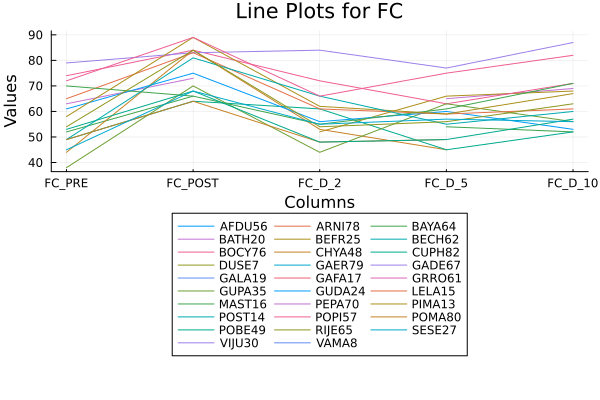

In [10]:
multi_line_plot(df_160, "FC")

In [11]:
include("../preprocessing.jl")

addCOURSE_SUJET (generic function with 1 method)

In [12]:
data = XLSX.readxlsx("../../Ressources/Données complètes UT4M final120419 avec Data cardio.xlsx")["Tableau_gl"]
data = data["A1:SD80"]

df = DataFrame(data[2:end, 2:end], Symbol.(data[1, 2:end]), makeunique=true)
CODE_SUJET = DataFrame([:"CODE_SUJET" => data[2:end,1]])
df = hcat(CODE_SUJET, df)
df = replaceDF(df,-1,missing)

Row,CODE_SUJET,COURSE,AGE,POIDS_INC,TAILLE,EXP_TRAIL,TRAINING,CL_SCRA,TOT_SCRA,CL_SEH,TOT_SEH,CL_SEF,TOT_SEF,CL_V1H,TOT_V1H,CL_V1F,TOT_V1F,CL_V2H,TOT_V2H,CL_V2F,TOT_V2F,DDC,HDA,PF_DOUBLET_100HZ_PRE,PF_DOUBLET_100HZ_POST,PF_DOUBLET_100HZ_D_2,PF_DOUBLET_100HZ_D_5,PF_DOUBLET_100HZ_D_10,PF_DOUBLET_10HZ_PRE,PF_DOUBLET_10HZ_POST,PF_DOUBLET_10HZ_D_2,PF_DOUBLET_10HZ_D_5,PF_DOUBLET_10HZ_D_10,PF_FORCE_RATIO10:100_PRE,PF_FORCE_RATIO10:100_POST,PF_FORCE_RATIO10:100_D_2,PF_FORCE_RATIO10:100_D_5,PF_FORCE_RATIO10:100_D_10,PF_MVC_NO_STIM_PRE,PF_MVC_NO_STIM_POST,PF_MVC_NO_STIM_D_2,PF_MVC_NO_STIM_D_5,PF_MVC_NO_STIM_D_10,PF_SINGLE_TW_PRE,PF_SINGLE_TW_POST,PF_SINGLE_TW_D_2,PF_SINGLE_TW_D_5,PF_SINGLE_TW_D_10,PF_VA_PRE,PF_VA_POST,PF_VA_D_2,PF_VA_D_5,PF_VA_D_10,KE_DOUBLET_100HZ_PRE,KE_DOUBLET_100HZ_POST,KE_DOUBLET_100HZ_D_2,KE_DOUBLET_100HZ_D_5,KE_DOUBLET_100HZ_D_10,KE_DOUBLET_10HZ_PRE,KE_DOUBLET_10HZ_POST,KE_DOUBLET_10HZ_D_2,KE_DOUBLET_10HZ_D_5,KE_DOUBLET_10HZ_D_10,KE_RATIO10:100_PRE,KE_RATIO10:100_POST,KE_RATIO10:100_D_2,KE_RATIO10:100_D_5,KE_RATIO10:100_D_10,KE_MVC_NO_STIM_PRE,KE_MVC_NO_STIM_POST,KE_MVC_NO_STIM_D_2,KE_MVC_NO_STIM_D_5,KE_MVC_NO_STIM_D_10,KE_SINGLE_TW_PRE,KE_SINGLE_TW_POST,KE_SINGLE_TW_D_2,KE_SINGLE_TW_D_5,KE_SINGLE_TW_D_10,KE_VA_PRE,KE_VA_POST,KE_VA_D_2,KE_VA_D_5,KE_VA_D_10,RR_COUCHE_PRE,SDNN_COUCHE_PRE,HR_COUCHE_PRE,RMSSD_COUCHE_PRE,PNN50_COUCHE_PRE,LF_COUCHE_PRE,HF_COUCHE_PRE,LFHF_COUCHE_PRE,DUREE_TEST_COUCHE_PRE,RR_DEBOUT_PRE,SDNN_DEBOUT_PRE,HR_DEBOUT_PRE,RMSSD_DEBOUT_PRE,PNN50_DEBOUT_PRE,LF_DEBOUT_PRE,HF_DEBOUT_PRE,LFHF_DEBOUT_PRE,⋯
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,⋯
1,AMJE41,100,26,72,176,4,3.5,461,474,200,204,998,998,998,998,998,998,998,998,998,998,1819,11:19:00,56,34,47,49,55,53,26,42,46,52,0.946429,0.764706,0.893617,0.938776,0.945455,163,153,177,148,164,36,22,29,31,35,100,94.1176,100,97.9592,100,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1184.4,115.1,51.14,144.5,72.2,22.5,77.5,0.291,300,932.2,93.2,65.03,38.4,17.4,69.3,30.7,2.26,⋯
2,BELA77,100,51,64,178,4,3.5,248,474,998,998,998,998,998,998,998,998,27,64,998,998,1228,01:27:00,36,33,38,39,40,35,29,35,36,37,0.972222,0.878788,0.921053,0.923077,0.925,175,89,129,160,164,23,18,22,23,24,100,84.8485,100,100,100,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,553,333,410,480,493,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1103.5,39.5,54.44,27.3,6.2,57.5,42.4,1.356,300,932.5,58.6,64.61,20.5,1.9,84.7,15.3,5.549,⋯
3,BLLI42,100,43,65,175,4,2.5,261,474,998,998,998,998,77,136,998,998,998,998,998,998,1245,01:44:00,57,52,57,56,52,56,50,59,59,52,0.982456,0.961538,1.03509,1.05357,1,177,126,185,170,187,35,31,39,34,33,91.2281,78.8462,89.4737,80.3571,84.6154,248,233,263,242,267,233,203,248,243,267,0.939516,0.871245,0.942966,1.00413,1,511,379,444,464,500,174,158,167,150,170,91.9355,90.1288,95.057,95.0413,97.7528,1053.3,84.1,57.36,38.6,19.3,74.4,25.6,2.912,300,870.6,75.1,69.48,29.1,5.8,93.7,6.2,15.029,⋯
4,BOAN44,100,26,51,165,4,3,410,474,998,998,19,25,998,998,998,998,998,998,998,998,1570,07:09:00,46,34,45,44,42,46,32,44,44,43,1,0.941176,0.977778,1,1.02381,105,61,90,107,101,28,19,26,26,26,76.087,50,75.5556,84.0909,66.6667,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,355,142,284,296,328,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,

In [13]:
mesures = df[:,24:213]
mesures_cardiaques = df[:,267:end]

Row,PAS_PRE,PAD_PRE,PAM_PRE,SC,FC_PRE,S_PRE,DTDVG_PRE,DTDVGI_PRE,PP_PRE,calcul,DTS_PRE,FR_PRE,FE_PRE,H/R_PRE,MVG_PRE,MVGI_PRE,E_PRE,A_PRE,E/A_PRE,TDM_PRE,Ea_PRE,E/Ea_PRE,ITV Ao_PRE,CC VG_PRE,Qc_PRE,IC_PRE,ITV_PULM_PRE,PAPMAX_PRE,Et_PRE,At_PRE,E/A_PRE_1,TD_PRE,St_PRE,VOL_OG_PRE,VOL_OGI_PRE,VOL_OD_PRE,VOL_ODI_PRE,VTDVG_PRE,VTDVGI_PRE,VTSVG_PRE,VTSVGI_PRE,VES_PRE,FE2D_PRE,STD_PRE,STS_PRE,STDi_PRE,STSi_PRE,FRVD_PRE,PAS_POST,PAD_POST,PAM_POST,FC_POST,S_POST,DTDVG_POST,DTDVGI_POST,PP_POST,calcul_1,DTS_POST,FR_POST,FE_POST,H/R_POST,MVG_POST,MVGI_POST,E_POST,A_POST,E/A_POST,TDM_POST,Ea_POST,E/Ea_POST,ITV Ao_POST,Qc_POST,IC_POST,ITVPUL_POST,PAPS_POST,Et_POST,At_POST,E/A_POST_1,TD_POST,St_POST,VOLOG_POST,VOLOGI_POST,VOLOD_POST,VOLODI_POST,VTDVG_POST,VTDVGI_POST,VTSVG_POST,VTSVGI_POST,VES_POST,FE2D_POST,STD_POST,STS_POST,STDi_POST,STSi_POST,FRVD_POST,PAS_D_2,PAD_D_2,PAM_D_2,FC_D_2,S_D_2,DTDVG_D_2,⋯
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,⋯
1,132,80,97.3333,1.87,58,10,48,25.6684,9,67,33,0.3125,57,0.395833,158.223,84.6112,67,31,2.16129,203,18,3.72222,13.8,2.4,3.61909,1.93534,21,missing,66,28,2.35714,246,16,51,27.2727,46,24.5989,135,72.1925,59,31.5508,76,58,23.1,12.3,12.3529,6.57754,0.467532,118,74,88.6667,79,10,47,25.1337,10,67,31,0.340426,64,0.425532,163.855,87.6228,63,46,1.36957,183,18,3.5,16.9,6.03679,3.22823,23.2,35,60,26,2.30769,287,13,57,30.4813,49,26.2032,119,63.6364,52,27.8075,67,65,23.8,11.6,12.7273,6.20321,0.512605,122,75,90.6667,62,10,48,⋯
2,117,68,84.3333,1.79,60,10,45,25.1397,10,65,25,0.444444,75,0.444444,152.673,85.292,57,38,1.5,255,16,3.5625,21.6,2.6,6.87735,3.8421,18.9,28,52,25,2.08,178,14,44,24.581,59,32.9609,110,61.4525,41,22.905,69,63,20.7,9.6,11.5642,5.36313,0.536232,96,62,73.3333,61,10,47,26.257,10,67,30,0.361702,56,0.425532,163.855,91.5389,59,32,1.84375,209,11,5.36364,14.4,4.66132,2.60409,12.7,20,51,25,2.04,250,14,49,27.3743,66,36.8715,115,64.2458,42,missing,missing,missing,23.5,15,13.1285,8.37989,0.361702,missing,missing,missing,missing,missing,missing,⋯
3,126,74,91.3333,1.8,55,10,47,26.1111,10,67,33,0.297872,56,0.425532,163.855,91.0304,66,51,1.29412,215,17,3.88235,17.1,2.2,3.57334,1.98519,17,missing,53,26,2.03846,199,16,60,33.3333,42,23.3333,91,50.5556,44,24.4444,47,52,21.6,9.5,12,5.27778,0.560185,107,72,83.6667,69,10,46,25.5556,10,66,32,0.304348,57,0.434783,158.214,87.8965,69,38,1.81579,212,11,6.27273,16,4.19454,2.3303,18.5,25,53,28,1.89286,195,19,67,37.2222,46,25.5556,95,52.7778,46,25.5556,49,missing,22.8,11,12.6667,6.11111,0.517544,129,88,101.667,58,10,49,⋯
4,103,65,77.6667,1.53,54,9,44,28.7582,9,62,28,0.363636,66,0.409091,127.416,83.2787,59,33,1.78788,201,missing,missing,20.5,1.9,3.13707,2.05037,19.2,missing,48,17,2.82353,237,10,43,28.1046,32,20.915,81,52.9412,38,24.8366,43,53,17.7,8.6,11.5686,5.62092,0.514124,97,77,83.6667,88,8,39,25.4902,8,55,25,0.358974,65,0.410256,89.0712,58.2165,43,32,1.34375,188,13,3.30769,16.7,4.16463,2.72198,10.3,21,27,25,1.08,155,14,48,31.3725,39,25.4902,85,55.5556,38,24.8366,47,51,20.5,14.5,13.3987,9.47712,0.292683,106,74,84.6667,54,8,43,⋯
5,123,68,86.3333,1.9,50,10,58,30.5263,12,80,35,0.396552,71,0.37931,263.651,138.764,76,46,1.65217,185,18,4.22222,25.5,2.5,6.25547,3.29235,19.6,missing,50,26,1.92308,284,13,103,54.2105,75,39.4737,123,64.7368,58,30.5263,65,53,25.9,13,13.6316,6.84211,0.498069,98,58,71.3333,52,9,53,27.8947,10,72,33,0.377358,75,0.358491,186.677,98.2512,51,36,1.41667,238,15,3.4,22.8,5.81685,3.0615,15,22,52,27,1.92593,254,12,112,58.9474,86,45.2632,125,65.7895,49,25.7895,76,57,26.3,13.8,13.8421,7.26316,0.475285,missing,missing,0,45,9,60,⋯
6,110,62,78,1.95,51,11,57,29.2308,10,78,36,0.368421,65,0.368421,240.747,123.46,41,30

In [14]:
res = colToRow(mesures_cardiaques)

Row,TIME,STDi,DTDVGI,At,VOLODI,TDM,PP,VOL_OGI,ITVPUL,Et,E/A_1,Ea,STSi,FR,VOL_OG,DTDVG,STS,VES,VOLOD,TD,E/Ea,VTDVGI,S,PAPS,PAPMAX,FRVD,ITV Ao,STD,MVG,Qc,VTDVG,PAD,VOLOGI,H/R,MVGI,E/A,FC,CC VG,ITV_PULM,PAM,VTSVGI,FE,VTSVG,PAS,IC,VOL_OD,St,FE2D,VOLOG,A,E,VOL_ODI,DTS
,String,Any,Any,Any,Any,Any,Any,Any,Any,Any,Missing,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,-2,12.3529,25.6684,28,missing,203,9,27.2727,missing,66,missing,18,6.57754,0.3125,51,48,12.3,76,missing,246,3.72222,72.1925,10,missing,missing,0.467532,13.8,23.1,158.223,3.61909,135,80,missing,0.395833,84.6112,2.16129,58,2.4,21,97.3333,31.5508,57,59,132,1.93534,46,16,58,missing,31,67,24.5989,33
2,-2,11.5642,25.1397,25,missing,255,10,24.581,missing,52,missing,16,5.36313,0.444444,44,45,9.6,69,missing,178,3.5625,61.4525,10,missing,28,0.536232,21.6,20.7,152.673,6.87735,110,68,missing,0.444444,85.292,1.5,60,2.6,18.9,84.3333,22.905,75,41,117,3.8421,59,14,63,missing,38,57,32.9609,25
3,-2,12,26.1111,26,missing,215,10,33.3333,missing,53,missing,17,5.27778,0.297872,60,47,9.5,47,missing,199,3.88235,50.5556,10,missing,missing,0.560185,17.1,21.6,163.855,3.57334,91,74,missing,0.425532,91.0304,1.29412,55,2.2,17,91.3333,24.4444,56,44,126,1.98519,42,16,52,missing,51,66,23.3333,33
4,-2,11.5686,28.7582,17,missing,201,9,28.1046,missing,48,missing,missing,5.62092,0.363636,43,44,8.6,43,missing,237,missing,52.9412,9,missing,missing,0.514124,20.5,17.7,127.416,3.13707,81,65,missing,0.409091,83.2787,1.78788,54,1.9,19.2,77.6667,24.8366,66,38,103,2.05037,32,10,53,missing,33,59,20.915,28
5,-2,13.6316,30.5263,26,missing,185,12,54.2105,missing,50,missing,18,6.84211,0.396552,103,58,13,65,missing,284,4.22222,64.7368,10,missing,missing,0.498069,25.5,25.9,263.651,6.25547,123,68,missing,0.37931,138.764,1.65217,50,2.5,19.6,86.3333,30.5263,71,58,123,3.29235,75,13,53,missing,46,76,39.4737,35
6,-2,12.1026,29.2308,20,missing,327,10,36.9231,missing,38,missing,9,7.64103,0.368421,72,57,14.9,73,missing,203,4.55556,68.7179,11,missing,17,0.368644,15.8,23.6,240.747,4.95922,134,62,missing,0.368421,123.46,1.36667,51,2.8,missing,78,31.2821,65,61,110,2.54319,77,12,54,missing,30,41,39.4872,36
7,-2,13.6585,29.2683,missing,missing,214,11,41.9512,missing,missing,missing,21,8.4878,0.383333,86,60,17.4,75,missing,200,4.04762,70.2439,10,missing,25,0.378571,31.9,28,262.448,7.21195,144,77,missing,0.35,128.023,1.77083,50,2.4,22.2,97,33.6585,68,69,137,3.51803,76,15,52,missing,48,85,37.0732,37
8,-2,12.1341,34.7561,31,missing,206,9,50,missing,54,missing,16,6.40244,0.315789,82,57,10.5,69,missing,174,4.5,74.3902,9,missing,28,0.472362,24.8,19.9,196.92,5.66636,122,68,missing,0.315789,120.073,1.6,66,2.1,19.1,82.6667,32.3171,59,53,112,3.4551,60,14,57,missing,45,72,36.5854,39
9,-2,9.53846,25.641,24,missing,224,9,32.3077,missing,55,missing,17,5.94872,0.32,63,50,11.6,75,missing,228,4.64706,69.7436,10,missing,missing,0.376344,25.9,18.6,169.32,5.02107,136,70,missing,0.38,86.8308,1.68085,56,2.1,19.1,87,31.2821,60,61,121,2.57491,45,14,55,missing,47,79,23.0769,34


In [15]:
res = addCOURSE_SUJET(df, res)

Row,CODE_SUJET,COURSE,TIME,STDi,DTDVGI,At,VOLODI,TDM,PP,VOL_OGI,ITVPUL,Et,E/A_1,Ea,STSi,FR,VOL_OG,DTDVG,STS,VES,VOLOD,TD,E/Ea,VTDVGI,S,PAPS,PAPMAX,FRVD,ITV Ao,STD,MVG,Qc,VTDVG,PAD,VOLOGI,H/R,MVGI,E/A,FC,CC VG,ITV_PULM,PAM,VTSVGI,FE,VTSVG,PAS,IC,VOL_OD,St,FE2D,VOLOG,A,E,VOL_ODI,DTS
,Int64,Any,String,Any,Any,Any,Any,Any,Any,Any,Any,Any,Missing,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1,100,-2,12.3529,25.6684,28,missing,203,9,27.2727,missing,66,missing,18,6.57754,0.3125,51,48,12.3,76,missing,246,3.72222,72.1925,10,missing,missing,0.467532,13.8,23.1,158.223,3.61909,135,80,missing,0.395833,84.6112,2.16129,58,2.4,21,97.3333,31.5508,57,59,132,1.93534,46,16,58,missing,31,67,24.5989,33
2,2,100,-2,11.5642,25.1397,25,missing,255,10,24.581,missing,52,missing,16,5.36313,0.444444,44,45,9.6,69,missing,178,3.5625,61.4525,10,missing,28,0.536232,21.6,20.7,152.673,6.87735,110,68,missing,0.444444,85.292,1.5,60,2.6,18.9,84.3333,22.905,75,41,117,3.8421,59,14,63,missing,38,57,32.9609,25
3,3,100,-2,12,26.1111,26,missing,215,10,33.3333,missing,53,missing,17,5.27778,0.297872,60,47,9.5,47,missing,199,3.88235,50.5556,10,missing,missing,0.560185,17.1,21.6,163.855,3.57334,91,74,missing,0.425532,91.0304,1.29412,55,2.2,17,91.3333,24.4444,56,44,126,1.98519,42,16,52,missing,51,66,23.3333,33
4,4,100,-2,11.5686,28.7582,17,missing,201,9,28.1046,missing,48,missing,missing,5.62092,0.363636,43,44,8.6,43,missing,237,missing,52.9412,9,missing,missing,0.514124,20.5,17.7,127.416,3.13707,81,65,missing,0.409091,83.2787,1.78788,54,1.9,19.2,77.6667,24.8366,66,38,103,2.05037,32,10,53,missing,33,59,20.915,28
5,5,100,-2,13.6316,30.5263,26,missing,185,12,54.2105,missing,50,missing,18,6.84211,0.396552,103,58,13,65,missing,284,4.22222,64.7368,10,missing,missing,0.498069,25.5,25.9,263.651,6.25547,123,68,missing,0.37931,138.764,1.65217,50,2.5,19.6,86.3333,30.5263,71,58,123,3.29235,75,13,53,missing,46,76,39.4737,35
6,6,100,-2,12.1026,29.2308,20,missing,327,10,36.9231,missing,38,missing,9,7.64103,0.368421,72,57,14.9,73,missing,203,4.55556,68.7179,11,missing,17,0.368644,15.8,23.6,240.747,4.95922,134,62,missing,0.368421,123.46,1.36667,51,2.8,missing,78,31.2821,65,61,110,2.54319,77,12,54,missing,30,41,39.4872,36
7,7,100,-2,13.6585,29.2683,missing,missing,214,11,41.9512,missing,missing,missing,21,8.4878,0.383333,86,60,17.4,75,missing,200,4.04762,70.2439,10,missing,25,0.378571,31.9,28,262.448,7.21195,144,77,missing,0.35,128.023,1.77083,50,2.4,22.2,97,33.6585,68,69,137,3.51803,76,15,52,missing,48,85,37.0732,37
8,8,100,-2,12.1341,34.7561,31,missing,206,9,50,missing,54,missing,16,6.40244,0.315789,82,57,10.5,69,missing,174,4.5,74.3902,9,missing,28,0.472362,24.8,19.9,196.92,5.66636,122,68,missing,0.315789,120.073,1.6,66,2.1,19.1,82.6667,32.3171,59,53,112,3.4551,60,14,57,missing,45,72,36.5854,39
9,9,100,-2,9.53846,25.641,24,missing,224,9,32.3077,missing,55,missing,17,5.94872,0.32,63,50,11.6,75,missing,228,4.64706,69.7436,10,missing,missing,0.376344,25.9,18.6,169.32,5.02107,136,70,missing,0.38,86.8308,1.68085,56,2.1,19.1,87,31.2821,60,61,121,2.57491,45,14,55,missing,47,79,23.0769,34


In [16]:
res.TIME = parse.(Int16,res.TIME)
grouped_res = groupby(res, :COURSE)
course_100 = grouped_res[1]

Row,CODE_SUJET,COURSE,TIME,STDi,DTDVGI,At,VOLODI,TDM,PP,VOL_OGI,ITVPUL,Et,E/A_1,Ea,STSi,FR,VOL_OG,DTDVG,STS,VES,VOLOD,TD,E/Ea,VTDVGI,S,PAPS,PAPMAX,FRVD,ITV Ao,STD,MVG,Qc,VTDVG,PAD,VOLOGI,H/R,MVGI,E/A,FC,CC VG,ITV_PULM,PAM,VTSVGI,FE,VTSVG,PAS,IC,VOL_OD,St,FE2D,VOLOG,A,E,VOL_ODI,DTS
,Int64,Any,Int16,Any,Any,Any,Any,Any,Any,Any,Any,Any,Missing,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1,100,-2,12.3529,25.6684,28,missing,203,9,27.2727,missing,66,missing,18,6.57754,0.3125,51,48,12.3,76,missing,246,3.72222,72.1925,10,missing,missing,0.467532,13.8,23.1,158.223,3.61909,135,80,missing,0.395833,84.6112,2.16129,58,2.4,21,97.3333,31.5508,57,59,132,1.93534,46,16,58,missing,31,67,24.5989,33
2,2,100,-2,11.5642,25.1397,25,missing,255,10,24.581,missing,52,missing,16,5.36313,0.444444,44,45,9.6,69,missing,178,3.5625,61.4525,10,missing,28,0.536232,21.6,20.7,152.673,6.87735,110,68,missing,0.444444,85.292,1.5,60,2.6,18.9,84.3333,22.905,75,41,117,3.8421,59,14,63,missing,38,57,32.9609,25
3,3,100,-2,12,26.1111,26,missing,215,10,33.3333,missing,53,missing,17,5.27778,0.297872,60,47,9.5,47,missing,199,3.88235,50.5556,10,missing,missing,0.560185,17.1,21.6,163.855,3.57334,91,74,missing,0.425532,91.0304,1.29412,55,2.2,17,91.3333,24.4444,56,44,126,1.98519,42,16,52,missing,51,66,23.3333,33
4,4,100,-2,11.5686,28.7582,17,missing,201,9,28.1046,missing,48,missing,missing,5.62092,0.363636,43,44,8.6,43,missing,237,missing,52.9412,9,missing,missing,0.514124,20.5,17.7,127.416,3.13707,81,65,missing,0.409091,83.2787,1.78788,54,1.9,19.2,77.6667,24.8366,66,38,103,2.05037,32,10,53,missing,33,59,20.915,28
5,5,100,-2,13.6316,30.5263,26,missing,185,12,54.2105,missing,50,missing,18,6.84211,0.396552,103,58,13,65,missing,284,4.22222,64.7368,10,missing,missing,0.498069,25.5,25.9,263.651,6.25547,123,68,missing,0.37931,138.764,1.65217,50,2.5,19.6,86.3333,30.5263,71,58,123,3.29235,75,13,53,missing,46,76,39.4737,35
6,6,100,-2,12.1026,29.2308,20,missing,327,10,36.9231,missing,38,missing,9,7.64103,0.368421,72,57,14.9,73,missing,203,4.55556,68.7179,11,missing,17,0.368644,15.8,23.6,240.747,4.95922,134,62,missing,0.368421,123.46,1.36667,51,2.8,missing,78,31.2821,65,61,110,2.54319,77,12,54,missing,30,41,39.4872,36
7,7,100,-2,13.6585,29.2683,missing,missing,214,11,41.9512,missing,missing,missing,21,8.4878,0.383333,86,60,17.4,75,missing,200,4.04762,70.2439,10,missing,25,0.378571,31.9,28,262.448,7.21195,144,77,missing,0.35,128.023,1.77083,50,2.4,22.2,97,33.6585,68,69,137,3.51803,76,15,52,missing,48,85,37.0732,37
8,8,100,-2,12.1341,34.7561,31,missing,206,9,50,missing,54,missing,16,6.40244,0.315789,82,57,10.5,69,missing,174,4.5,74.3902,9,missing,28,0.472362,24.8,19.9,196.92,5.66636,122,68,missing,0.315789,120.073,1.6,66,2.1,19.1,82.6667,32.3171,59,53,112,3.4551,60,14,57,missing,45,72,36.5854,39
9,9,100,-2,9.53846,25.641,24,missing,224,9,32.3077,missing,55,missing,17,5.94872,0.32,63,50,11.6,75,missing,228,4.64706,69.7436,10,missing,missing,0.376344,25.9,18.6,169.32,5.02107,136,70,missing,0.38,86.8308,1.68085,56,2.1,19.1,87,31.2821,60,61,121,2.57491,45,14,55,missing,47,79,23.0769,34


In [17]:
groupe_ind_100 = groupby(course_100,:CODE_SUJET)

Row,CODE_SUJET,COURSE,TIME,STDi,DTDVGI,At,VOLODI,TDM,PP,VOL_OGI,ITVPUL,Et,E/A_1,Ea,STSi,FR,VOL_OG,DTDVG,STS,VES,VOLOD,TD,E/Ea,VTDVGI,S,PAPS,PAPMAX,FRVD,ITV Ao,STD,MVG,Qc,VTDVG,PAD,VOLOGI,H/R,MVGI,E/A,FC,CC VG,ITV_PULM,PAM,VTSVGI,FE,VTSVG,PAS,IC,VOL_OD,St,FE2D,VOLOG,A,E,VOL_ODI,DTS
,Int64,Any,Int16,Any,Any,Any,Any,Any,Any,Any,Any,Any,Missing,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1,100,-2,12.3529,25.6684,28,missing,203,9,27.2727,missing,66,missing,18,6.57754,0.3125,51,48,12.3,76,missing,246,3.72222,72.1925,10,missing,missing,0.467532,13.8,23.1,158.223,3.61909,135,80,missing,0.395833,84.6112,2.16129,58,2.4,21,97.3333,31.5508,57,59,132,1.93534,46,16,58,missing,31,67,24.5989,33
2,1,100,1,12.7273,25.1337,26,26.2032,183,10,missing,23.2,60,missing,18,6.20321,0.340426,missing,47,11.6,67,49,287,3.5,63.6364,10,35,missing,0.512605,16.9,23.8,163.855,6.03679,119,74,30.4813,0.425532,87.6228,1.36957,79,missing,missing,88.6667,27.8075,64,52,118,3.22823,missing,13,65,57,46,63,missing,31
3,1,100,3,11.5508,25.6684,31,32.0856,269,10,missing,20.4,73,missing,20,6.04278,0.375,missing,48,11.3,74,60,276,4,70.0535,10,21,missing,0.476852,21.2,21.6,169.595,5.94319,131,75,37.4332,0.416667,90.6928,2.28571,62,missing,missing,90.6667,30.4813,68,57,122,3.17818,missing,14,56,70,35,80,missing,30
4,1,100,6,13.8503,26.2032,32,32.0856,174,10,missing,19.3,66,missing,19,8.34225,0.142857,missing,49,15.6,missing,60,208,3.73684,70.0535,10,missing,missing,0.397683,23.4,25.9,175.436,6.03091,131,74,34.7594,0.408163,93.8161,1.65116,57,missing,missing,94.3333,31.016,63,58,135,3.22509,missing,16,missing,65,43,71,missing,42
5,1,100,11,13.9037,26.2032,34,29.4118,207,9,missing,22.7,86,missing,20,7.00535,0.428571,missing,49,13.1,71,55,215,3.75,64.7059,10,25,missing,0.496154,21.4,26,163.724,5.80573,121,67,28.877,0.387755,87.553,1.875,60,missing,missing,85.6667,26.738,73,50,123,3.10467,missing,17,55,54,40,75,missing,28
Row,CODE_SUJET,COURSE,TIME,STDi,DTDVGI,At,VOLODI,TDM,PP,VOL_OGI,ITVPUL,Et,E/A_1,Ea,STSi,FR,VOL_OG,DTDVG,STS,VES,VOLOD,TD,E/Ea,VTDVGI,S,PAPS,PAPMAX,FRVD,ITV Ao,STD,MVG,Qc,VTDVG,PAD,VOLOGI,H/R,MVGI,E/A,FC,CC VG,ITV_PULM,PAM,VTSVGI,FE,VTSVG,PAS,IC,VOL_OD,St,FE2D,VOLOG,A,E,VOL_ODI,DTS
,Int64,Any,Int16,Any,Any,Any,Any,Any,Any,Any,Any,Any,Missing,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,12,100,-2,16.2766,29.2553,22,missing,196,9,35.1064,missing,47,missing,13,9.89362,0.345455,66,55,18.6,70,missing,195,5.84615,71.2766,9,missing,31,0.392157,17.5,30.6,185.239,5.53896,134,65,missing,0.327273,98.5312,1.58333,70,2.4,19.5,82.3333,34.0426,64,64,117,2.94626,51,18,52,missing,48,76,27.1277,36
2,12,100,1,13.2447,26.0638,30,27.6596,167,11,missing,13.5,47,missing,14,6.70213,0.244898,missing,49,12.6,52,52,205,4,54.7872,10,missing,missing,0.493976,18,24.9,187.493,6.5111,103,78,37.234,0.428571,99.7301,0.965517,80,missing,missing,86,27.1277,50,51,102,3.46335,missing,13,51,70,58,56,missing,37


In [30]:
include("../plot.jl")

plot_combined_data

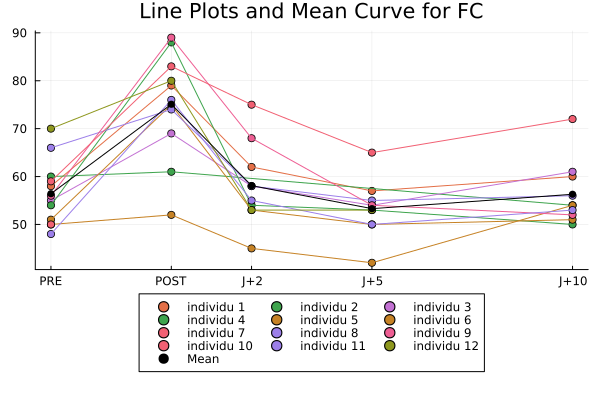

In [34]:
res_100 = filter(row -> row.COURSE == 100, res)
grouped_time_100 = groupby(res_100,:TIME)

plot_combined_data(groupe_ind_100, grouped_time_100, "FC")

